<a href="https://colab.research.google.com/github/kmiyasararafath/ML_ZOOMCAMP/blob/main/ML_zoom_camp_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML ZOOM CAMP HOME WORK 6


6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column 'price').

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

Let's load the data:


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-10-20 08:25:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.07s   

2021-10-20 08:25:29 (94.4 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [4]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2



*   Apply the log tranform to price
*   Do train/validation/test split with 60%/20%/20% distribution.
*   Use the train_test_split function and set the random_state parameter to 1







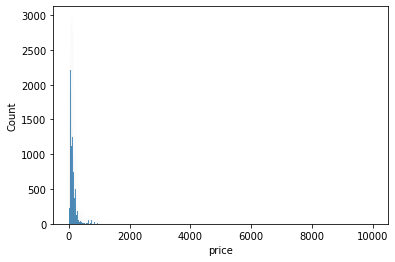

In [5]:
sns.histplot(df.price) 


In [6]:
df.price=np.log1p(df.price)

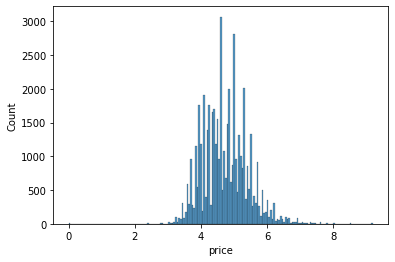

In [7]:
sns.histplot(df.price) 

In [11]:
from sklearn.model_selection import train_test_split
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)
y_train=df_train['price']
y_val=df_val['price']
y_test=df_test['price']
del df_train['price']
del df_val['price']
del df_test['price']

Now, use DictVectorizer to turn train and validation into matrices:

In [12]:
from sklearn.feature_extraction import DictVectorizer
train_dict=df_train.to_dict(orient='records')
val_dict=df_val.to_dict(orient='records')
test_dict=df_test.to_dict(orient='records')
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)
feature_names=dv.get_feature_names()
X_train=dv.transform(train_dict)
X_val=dv.transform(val_dict)
X_test=dv.transform(test_dict)



Question 1

Let's train a decision tree regressor to predict the price variable.

    Train a model with max_depth=1



In [17]:
from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor(max_depth=1)
dtreg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
from sklearn.tree import export_text
export_text(dtreg,feature_names=feature_names)

'|--- room_type=Entire home/apt <= 0.50\n|   |--- value: [4.29]\n|--- room_type=Entire home/apt >  0.50\n|   |--- value: [5.15]\n'



Which feature is used for splitting the data?

    room_type
    neighbourhood_group
    number_of_reviews
    reviews_per_month

room_type


Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)



In [26]:
def my_rmse(y_pred,y_train):
  serr=(y_pred-y_train)**2
  m_serr=serr.mean()
  return np.sqrt(m_serr)

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10,random_state=1)#,n_jobs=-1)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [27]:
y_pred=rf_reg.predict(X_val)
rmse=my_rmse(y_pred,y_val)
print(round(rmse,3))

0.461




What's the RMSE of this model on validation?

    0.059
    0.259
    0.459
    0.659

0.459


Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10
    Set random_state to 1
    Evaluate the model on the validation dataset



In [31]:
scores=[]
for num in range(10,200,10):
  rf_reg=RandomForestRegressor(n_estimators=num,random_state=1,n_jobs=-1)
  rf_reg.fit(X_train,y_train)
  y_pred=rf_reg.predict(X_val)
  rmse=my_rmse(y_pred,y_val)
  scores.append((num,rmse))


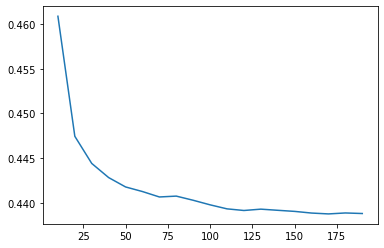

In [34]:
df_score=pd.DataFrame(scores,columns=['num_estimators','rmse'])
plt.plot(df_score['num_estimators'],df_score['rmse'])



After which value of n_estimators does RMSE stop improving?

    10
    50
    70
    120

120



Question 4

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
    Fix the random seed: random_state=1



In [35]:
scores=[]
for max_depth in [10, 15, 20, 25]:
  for num in range(10,200,10):
    rf_reg=RandomForestRegressor(n_estimators=num,max_depth=max_depth,random_state=1,n_jobs=-1)
    rf_reg.fit(X_train,y_train)
    y_pred=rf_reg.predict(X_val)
    rmse=my_rmse(y_pred,y_val)
    scores.append((max_depth,num,rmse))

In [42]:
scores
df_scores=pd.DataFrame(scores,columns=['max_depth','num_estimators','rmse'])
df_scores.head()

,max_depth,num_estimators,rmse
0,10,10,0.445210
1,10,20,0.441888
2,10,30,0.441207
3,10,40,0.441303
4,10,50,0.440947


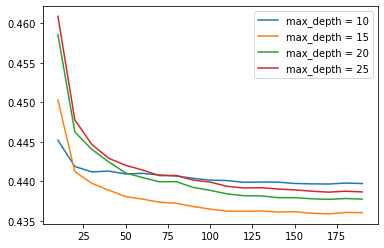

In [44]:
for m in [10, 15, 20, 25]:
  df_sub=df_scores[df_scores['max_depth']== m]
  plt.plot(df_sub['num_estimators'],df_sub.rmse,label='max_depth = %d' % m)
plt.legend()



What's the best max_depth:

    10
    15
    20
    25

15


Bonus question (not graded):

Will the answer be different if we change the seed for the model?


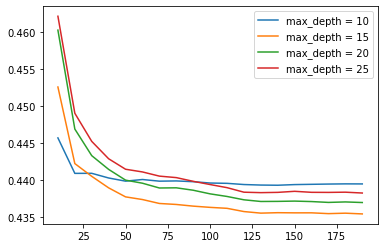

In [45]:
scores=[]
for max_depth in [10, 15, 20, 25]:
  for num in range(10,200,10):
    rf_reg=RandomForestRegressor(n_estimators=num,max_depth=max_depth,random_state=5,n_jobs=-1)
    rf_reg.fit(X_train,y_train)
    y_pred=rf_reg.predict(X_val)
    rmse=my_rmse(y_pred,y_val)
    scores.append((max_depth,num,rmse))
  
df_scores=pd.DataFrame(scores,columns=['max_depth','num_estimators','rmse'])
for max_depth in [10, 15, 20, 25]:
  df_sub=df_scores[df_scores.max_depth==max_depth]
  plt.plot(df_sub.num_estimators,df_sub.rmse,label='max_depth = %d' % max_depth)
plt.legend()

array([7.77310359e-02, 3.12944688e-02, 1.50174811e-01, 1.60962574e-01,
       5.37987202e-02, 3.12098556e-04, 1.25967514e-03, 3.32614478e-02,
       1.09752544e-03, 1.27959663e-04, 4.56216690e-02, 5.58956045e-02,
       3.79335637e-01, 4.33200979e-03, 4.79476301e-03])

Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parametes:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this mode

In [48]:
rf_reg=RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)
rf_reg.fit(X_train,y_train)
rf_reg.feature_importances_


array([7.65160846e-02, 3.09063525e-02, 1.52053975e-01, 1.53219337e-01,
       5.36452300e-02, 2.83822549e-04, 1.16611621e-03, 3.40167443e-02,
       1.15324234e-03, 1.18026952e-04, 4.35248857e-02, 5.24379349e-02,
       3.91896837e-01, 4.52061759e-03, 4.54079353e-03])

In [50]:
importance=[]
for i,feature in enumerate(feature_names):
  importance.append((feature,rf_reg.feature_importances_[i]))


In [55]:
df_importance=pd.DataFrame(importance,columns=['feature','importance'])
df_importance.sort_values('importance',ascending=False)

,feature,importance
12,room_type=Entire home/apt,0.391897
3,longitude,0.153219
2,latitude,0.152054
0,availability_365,0.076516
4,minimum_nights,0.053645
11,reviews_per_month,0.052438
10,number_of_reviews,0.043525
7,neighbourhood_group=Manhattan,0.034017
1,calculated_host_listings_count,0.030906
14,room_type=Shared room,0.004541




What's the most important feature?

    neighbourhood_group=Manhattan
    room_type=Entire home/apt
    longitude
    latitude

room_type=Entire home/apt


Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}



In [58]:
import xgboost as xgb

Create DMatrix for train and validation

In [59]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)

Create a watchlist

In [60]:
watchlist=[(dtrain, 'train'), (dval, 'val')]

In [61]:
xgb_params = { 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1, }

In [62]:
model=xgb.train( xgb_params,dtrain=dtrain,num_boost_round=100,evals=watchlist)

[0]	train-rmse:3.02752	val-rmse:3.02415
[1]	train-rmse:2.14667	val-rmse:2.1439
[2]	train-rmse:1.53878	val-rmse:1.53721
[3]	train-rmse:1.12557	val-rmse:1.12524
[4]	train-rmse:0.851002	val-rmse:0.851752
[5]	train-rmse:0.674904	val-rmse:0.677523
[6]	train-rmse:0.566867	val-rmse:0.571483
[7]	train-rmse:0.504476	val-rmse:0.511388
[8]	train-rmse:0.469135	val-rmse:0.477768
[9]	train-rmse:0.450101	val-rmse:0.459656
[10]	train-rmse:0.439151	val-rmse:0.449813
[11]	train-rmse:0.433304	val-rmse:0.444755
[12]	train-rmse:0.42939	val-rmse:0.442105
[13]	train-rmse:0.426859	val-rmse:0.440504
[14]	train-rmse:0.424518	val-rmse:0.439644
[15]	train-rmse:0.423031	val-rmse:0.439126
[16]	train-rmse:0.420145	val-rmse:0.437716
[17]	train-rmse:0.419024	val-rmse:0.437486
[18]	train-rmse:0.418434	val-rmse:0.437265
[19]	train-rmse:0.417949	val-rmse:0.437266
[20]	train-rmse:0.417245	val-rmse:0.437226
[21]	train-rmse:0.415279	val-rmse:0.436491
[22]	train-rmse:0.414449	val-rmse:0.436191
[23]	train-rmse:0.414126	val-rm

In [63]:
xgb_params = { 'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1, }
model=xgb.train( xgb_params,dtrain=dtrain,num_boost_round=100,evals=watchlist)

[0]	train-rmse:3.87217	val-rmse:3.86889
[1]	train-rmse:3.4915	val-rmse:3.4884
[2]	train-rmse:3.14949	val-rmse:3.14635
[3]	train-rmse:2.84231	val-rmse:2.83953
[4]	train-rmse:2.56649	val-rmse:2.56407
[5]	train-rmse:2.31905	val-rmse:2.31689
[6]	train-rmse:2.09713	val-rmse:2.09526
[7]	train-rmse:1.89832	val-rmse:1.89664
[8]	train-rmse:1.72031	val-rmse:1.71879
[9]	train-rmse:1.5612	val-rmse:1.55978
[10]	train-rmse:1.41919	val-rmse:1.41798
[11]	train-rmse:1.29245	val-rmse:1.29158
[12]	train-rmse:1.17975	val-rmse:1.1792
[13]	train-rmse:1.07969	val-rmse:1.07948
[14]	train-rmse:0.99115	val-rmse:0.991265
[15]	train-rmse:0.912897	val-rmse:0.913599
[16]	train-rmse:0.843951	val-rmse:0.845246
[17]	train-rmse:0.783592	val-rmse:0.785267
[18]	train-rmse:0.730789	val-rmse:0.733102
[19]	train-rmse:0.684904	val-rmse:0.687857
[20]	train-rmse:0.645011	val-rmse:0.648887
[21]	train-rmse:0.610787	val-rmse:0.615211
[22]	train-rmse:0.581375	val-rmse:0.586417
[23]	train-rmse:0.556266	val-rmse:0.562046
[24]	train-

In [64]:
xgb_params = { 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1, }
model=xgb.train( xgb_params,dtrain=dtrain,num_boost_round=100,evals=watchlist)

[0]	train-rmse:4.25336	val-rmse:4.2501
[1]	train-rmse:4.21141	val-rmse:4.20815
[2]	train-rmse:4.16988	val-rmse:4.16661
[3]	train-rmse:4.12877	val-rmse:4.12551
[4]	train-rmse:4.08807	val-rmse:4.08481
[5]	train-rmse:4.04779	val-rmse:4.04454
[6]	train-rmse:4.00792	val-rmse:4.00467
[7]	train-rmse:3.96845	val-rmse:3.96521
[8]	train-rmse:3.92937	val-rmse:3.92616
[9]	train-rmse:3.8907	val-rmse:3.88749
[10]	train-rmse:3.85242	val-rmse:3.84922
[11]	train-rmse:3.81452	val-rmse:3.81133
[12]	train-rmse:3.77701	val-rmse:3.77383
[13]	train-rmse:3.73988	val-rmse:3.73672
[14]	train-rmse:3.70313	val-rmse:3.69996
[15]	train-rmse:3.66674	val-rmse:3.66359
[16]	train-rmse:3.63073	val-rmse:3.62759
[17]	train-rmse:3.59508	val-rmse:3.59194
[18]	train-rmse:3.55979	val-rmse:3.55665
[19]	train-rmse:3.52487	val-rmse:3.52174
[20]	train-rmse:3.4903	val-rmse:3.48718
[21]	train-rmse:3.45608	val-rmse:3.45298
[22]	train-rmse:3.4222	val-rmse:3.41911
[23]	train-rmse:3.38867	val-rmse:3.38559
[24]	train-rmse:3.35548	val-rm



Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    0.01

0.1

IndentationError: ignored